
# ✅ Checkpoint 01 — Data Science & ML
**Datasets:**
- Individual Household Electric Power Consumption (UCI 00235)
- Appliances Energy Prediction (UCI 00374)




# PARTE 1 — Individual Household Electric Power Consumption (UCI 00235)
**Fonte (para uso no código):**
- Link dataset: `https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip`

**Observações importantes:**
- O dataset utiliza **;** como separador.
- Valores ausentes aparecem como **?**.
- As colunas principais incluem: `Global_active_power`, `Global_reactive_power`, `Voltage`, `Global_intensity`, `Sub_metering_1..3`.


## 1) Carregamento do dataset e exibição das 10 primeiras linhas

In [2]:

import io, zipfile, urllib.request
import pandas as pd
import numpy as np


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip"

with urllib.request.urlopen(url) as resp:
    zf = zipfile.ZipFile(io.BytesIO(resp.read()))
    inner_name = [n for n in zf.namelist() if n.endswith('.txt')][0]
    with zf.open(inner_name) as f:
        df = pd.read_csv(f, sep=';', na_values=['?'], low_memory=False)

df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


## 2) Diferença entre `Global_active_power` e `Global_reactive_power`

Global_active_power (kW): potência **ativa** consumida, ou seja, a parte da energia realmente convertida em trabalho útil (calor, luz, movimento).
    
Global_reactive_power (kVAR): potência **reativa**, associada a campos elétricos e magnéticos em cargas indutivas/capacitivas; não realiza trabalho útil diretamente, mas circula entre fonte e carga.

## 3) Verificar valores ausentes e quantificá-los

In [7]:

missing_counts = df.isna().sum().sort_values(ascending=False)
display(missing_counts.to_frame("missing"))
print("\nTotal de ausentes:", int(missing_counts.sum()))


,missing
Global_active_power,25979
Sub_metering_2,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_3,25979
Sub_metering_1,25979
Date,0
Time,0



Total de ausentes: 181853


## 4) Converter `Date` para datetime e criar coluna `Weekday`

In [9]:
# O formato do dataset é 'dd/mm/yyyy'
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

# Nova coluna: dia da semana
df['Weekday'] = df['Date'].dt.day_name()

display(df[['Date', 'Time', 'Weekday']].head(10))

,Date,Time,Weekday
0,2006-12-16,17:24:00,Saturday
1,2006-12-16,17:25:00,Saturday
2,2006-12-16,17:26:00,Saturday
3,2006-12-16,17:27:00,Saturday
4,2006-12-16,17:28:00,Saturday
5,2006-12-16,17:29:00,Saturday
6,2006-12-16,17:30:00,Saturday
7,2006-12-16,17:31:00,Saturday
8,2006-12-16,17:32:00,Saturday
9,2006-12-16,17:33:00,Saturday


## 5) Filtrar registros de 2007 e calcular média de consumo **diário** de `Global_active_power`

In [10]:

# Criar uma coluna datetime combinando Date+Time para permitir reamostragem
dt = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time'], errors='coerce')
df['DateTime'] = dt

df_2007 = df[(df['DateTime'].dt.year == 2007)].copy()

daily_mean_gap_2007 = (
    df_2007.set_index('DateTime')['Global_active_power']
          .astype(float)
          .resample('D')
          .mean()
)

print("Média diária de Global_active_power (2007) — primeiras linhas:")
display(daily_mean_gap_2007.head())
print("\nMédia geral (2007):", daily_mean_gap_2007.mean())


Média diária de Global_active_power (2007) — primeiras linhas:


,Global_active_power
DateTime,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281



Média geral (2007): 1.116143014214133


## 6) Gráfico de linha — variação de `Global_active_power` em um único dia (ex.: 2007-01-15)

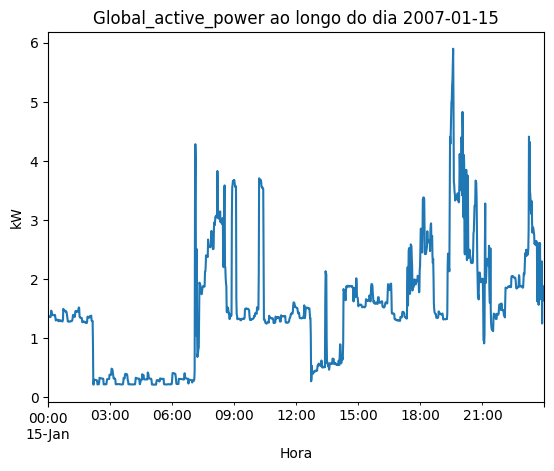

In [12]:
import matplotlib.pyplot as plt


dt = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time'], errors='coerce')
df['DateTime'] = dt

one_day = '2007-01-15'
mask_day = (df['DateTime'].dt.date == pd.to_datetime(one_day).date())
series_day = df.loc[mask_day, ['DateTime', 'Global_active_power']].dropna()
series_day = series_day.set_index('DateTime')['Global_active_power'].astype(float)

plt.figure()
series_day.plot()
plt.title(f"Global_active_power ao longo do dia {one_day}")
plt.xlabel("Hora")
plt.ylabel("kW")
plt.show()

## 7) Histograma de `Voltage` e observações sobre a distribuição

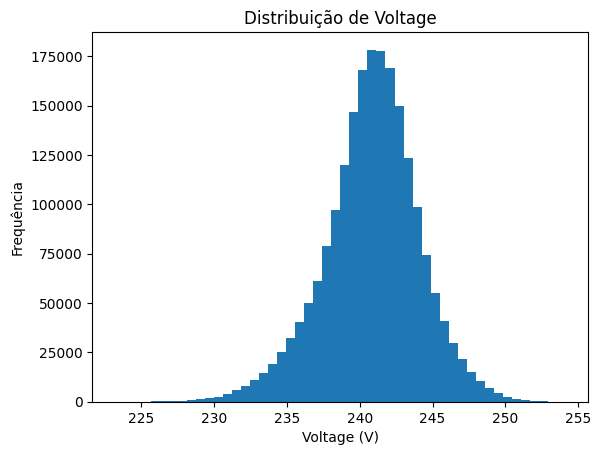

Observação: Em geral, a distribuição de 'Voltage' tende a ser unimodal, concentrada em torno da tensão nominal,
com pequena dispersão e possíveis caudas finas devido a variações na rede elétrica.


In [13]:

voltage = pd.to_numeric(df['Voltage'], errors='coerce').dropna()

plt.figure()
plt.hist(voltage, bins=50)
plt.title("Distribuição de Voltage")
plt.xlabel("Voltage (V)")
plt.ylabel("Frequência")
plt.show()

print("Observação: Em geral, a distribuição de 'Voltage' tende a ser unimodal, concentrada em torno da tensão nominal,")
print("com pequena dispersão e possíveis caudas finas devido a variações na rede elétrica.")


## 8) Consumo médio por **mês** em todo o período

In [14]:

monthly_mean_gap = (
    df.set_index('DateTime')['Global_active_power']
            .astype(float)
            .resample('M')
            .mean()
)
display(monthly_mean_gap.to_frame("mean_Global_active_power").head())


/tmp/ipython-input-1642785094.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


,mean_Global_active_power
DateTime,
2006-12-31,1.901295
2007-01-31,1.546034
2007-02-28,1.401084
2007-03-31,1.318627
2007-04-30,0.891189


## 9) Dia com **maior** consumo de energia ativa global

In [15]:

daily_sum_gap = (
    df.set_index('DateTime')['Global_active_power']
            .astype(float)
            .resample('D')
            .sum(min_count=1)
)

max_day = daily_sum_gap.idxmax()
print("Dia com maior consumo (soma de GAP):", max_day.date(), "— valor:", daily_sum_gap.max())


Dia com maior consumo (soma de GAP): 2006-12-23 — valor: 4773.386


## 10) Consumo médio em **dias de semana** vs **finais de semana**

In [16]:

df['is_weekend'] = df['DateTime'].dt.weekday >= 5

mean_weekday = (
    df[~df['is_weekend']].set_index('DateTime')['Global_active_power'].astype(float).resample('D').mean().mean()
)
mean_weekend = (
    df[df['is_weekend']].set_index('DateTime')['Global_active_power'].astype(float).resample('D').mean().mean()
)

print("Média diária (dias de semana):", mean_weekday)
print("Média diária (finais de semana):", mean_weekend)


Média diária (dias de semana): 1.0366861398387823
Média diária (finais de semana): 1.2311321638722605


## 11) Correlação entre `Global_active_power`, `Global_reactive_power`, `Voltage`, `Global_intensity`

In [17]:

cols = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity']
corr_df = df[cols].apply(pd.to_numeric, errors='coerce').corr()
display(corr_df)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Global_active_power,1.000000,0.247017,-0.399762,0.998889
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120
Voltage,-0.399762,-0.112246,1.000000,-0.411363
Global_intensity,0.998889,0.266120,-0.411363,1.000000


## 12) Nova variável `Total_Sub_metering` = soma de `Sub_metering_1..3`

In [18]:

for c in ['Sub_metering_1','Sub_metering_2','Sub_metering_3']:
    df[c] = pd.to_numeric(df[c], errors='coerce')

df['Total_Sub_metering'] = df[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].sum(axis=1)

display(df[['Sub_metering_1','Sub_metering_2','Sub_metering_3','Total_Sub_metering']].head())


,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
0,0.0,1.0,17.0,18.0
1,0.0,1.0,16.0,17.0
2,0.0,2.0,17.0,19.0
3,0.0,1.0,17.0,18.0
4,0.0,1.0,17.0,18.0


## 13) Mês em que `Total_Sub_metering` ultrapassa a **média** de `Global_active_power`

In [20]:

gap_mean = pd.to_numeric(df['Global_active_power'], errors='coerce').mean()

monthly_total_sub = (
    df.set_index('DateTime')['Total_Sub_metering']
            .resample('ME')
            .mean()
)

months_exceed = monthly_total_sub[monthly_total_sub > gap_mean]
print("Meses em que a média mensal de Total_Sub_metering > média geral de Global_active_power:")
display(months_exceed)


Meses em que a média mensal de Total_Sub_metering > média geral de Global_active_power:


,Total_Sub_metering
DateTime,
2006-12-31,10.871204
2007-01-31,10.423051
2007-02-28,9.485665
2007-03-31,10.212634
2007-04-30,6.249954
2007-05-31,8.452442
2007-06-30,7.371806
2007-07-31,5.681004
2007-08-31,6.975896


## 14) Série temporal de `Voltage` para **2008**

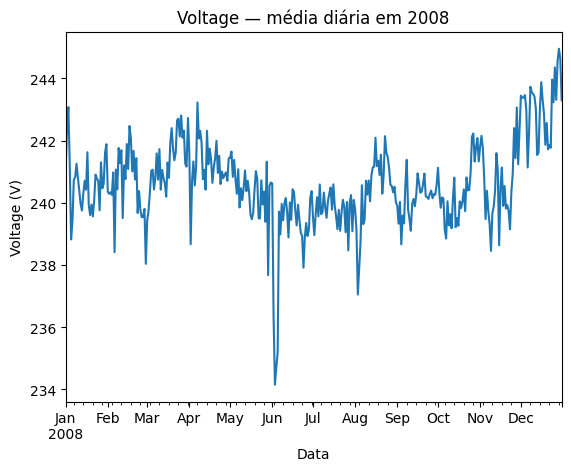

In [21]:

voltage_2008 = df[df['DateTime'].dt.year == 2008].set_index('DateTime')['Voltage'].astype(float).resample('D').mean()

plt.figure()
voltage_2008.plot()
plt.title("Voltage — média diária em 2008")
plt.xlabel("Data")
plt.ylabel("Voltage (V)")
plt.show()


## 15) Comparar consumo entre meses de **verão** e **inverno** (hemisfério norte)

In [22]:

# Hemisfério norte: verão ~ Jun-Set; inverno ~ Dez-Mar (aproximação)
series = df.set_index('DateTime')['Global_active_power'].astype(float).resample('D').mean()

summer_months = [6,7,8,9]
winter_months = [12,1,2,3]

summer_mean = series[series.index.month.isin(summer_months)].mean()
winter_mean = series[series.index.month.isin(winter_months)].mean()

print("Média diária no verão (HN):", summer_mean)
print("Média diária no inverno (HN):", winter_mean)


Média diária no verão (HN): 0.7877666189441016
Média diária no inverno (HN): 1.3711229415057178


## 16) Amostragem aleatória de **1%** e comparação de distribuição de `Global_active_power`

Média: 1.8678739996096039
Mediana: 1.622
Desvio padrão: 1.42698816690059


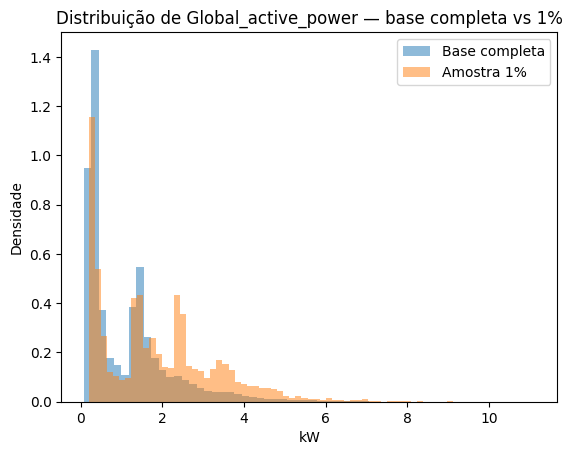

Teste KS — estatística: 0.009286170212765898 p-valor: 0.34508389103658155


In [25]:
# Converter para numérico e remover NA
gap_full = pd.to_numeric(df['Global_active_power'], errors='coerce').dropna()

# Amostra 1% iniciais usando iloc
n = int(0.01 * len(gap_full))  # 1% do total
sample_1pct = gap_full.iloc[0:n]

# Estatísticas
print("Média:", sample_1pct.mean())
print("Mediana:", sample_1pct.median())
print("Desvio padrão:", sample_1pct.std())

# Gráfico de distribuição
import matplotlib.pyplot as plt

plt.figure()
plt.hist(gap_full, bins=60, alpha=0.5, label='Base completa', density=True)
plt.hist(sample_1pct, bins=60, alpha=0.5, label='Amostra 1%', density=True)
plt.title("Distribuição de Global_active_power — base completa vs 1%")
plt.xlabel("kW")
plt.ylabel("Densidade")
plt.legend()
plt.show()


## 17) Normalização (Min-Max Scaling) das variáveis numéricas principais

In [26]:

from sklearn.preprocessing import MinMaxScaler

features_main = df[['Global_active_power','Global_reactive_power','Voltage','Global_intensity']].apply(pd.to_numeric, errors='coerce').dropna()
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features_main)
print("Shape após scaling:", features_scaled.shape)


Shape após scaling: (2049280, 4)


## 18) K-Means — segmentar **dias** em 3 grupos de consumo

In [27]:

from sklearn.cluster import KMeans

# Agregar por dia (médias diárias dessas variáveis)
daily_feats = (
    df.set_index('DateTime')[['Global_active_power','Global_reactive_power','Voltage','Global_intensity']]
            .apply(pd.to_numeric, errors='coerce')
            .resample('D')
            .mean()
            .dropna()
)

km = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = km.fit_predict(daily_feats)

daily_feats_clustered = daily_feats.copy()
daily_feats_clustered['cluster'] = clusters
display(daily_feats_clustered.head())

cluster_summary = daily_feats_clustered.groupby('cluster').mean()
print("Resumo por cluster (médias diárias):")
display(cluster_summary)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,cluster
DateTime,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,2
2006-12-17,2.354486,0.156949,240.087028,9.999028,2
2006-12-18,1.530435,0.112356,241.231694,6.421667,2
2006-12-19,1.157079,0.104821,241.999313,4.926389,2
2006-12-20,1.545658,0.111804,242.308062,6.467361,2


Resumo por cluster (médias diárias):


,Global_active_power,Global_reactive_power,Voltage,Global_intensity
cluster,,,,
0,0.884523,0.111268,235.295870,3.854046
1,0.839979,0.127514,240.888921,3.590786
2,1.478511,0.120823,241.714862,6.208909


## 19) Decomposição de série temporal (6 meses) — `Global_active_power`

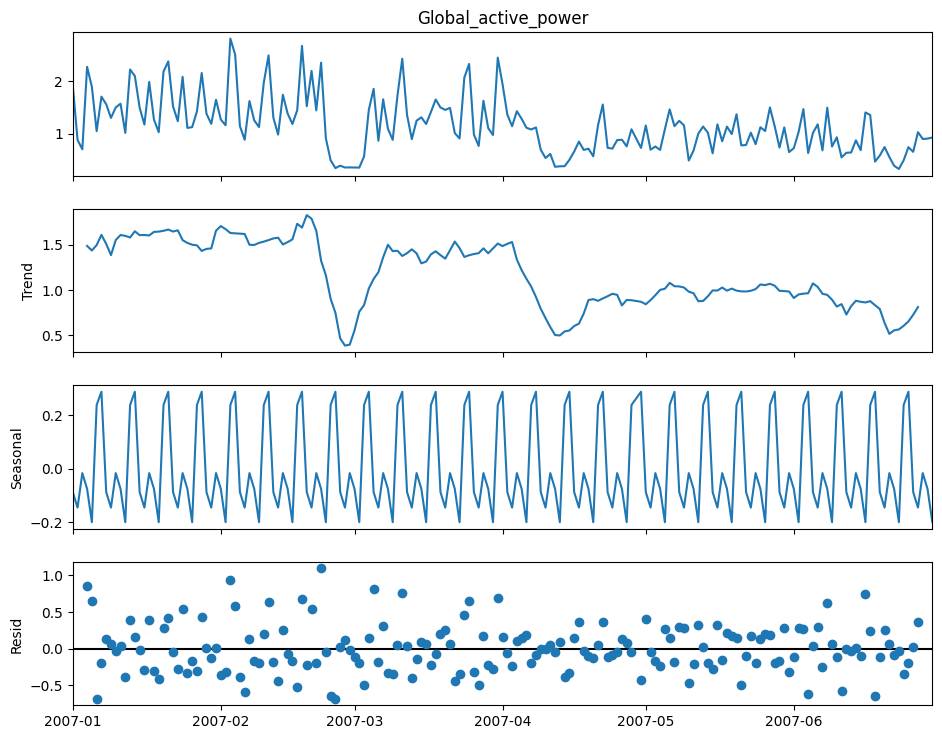

In [28]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Escolher uma janela de 6 meses (ex.: 2007-01 a 2007-06), com frequência diária
gap_daily = (
    df.set_index('DateTime')['Global_active_power']
            .apply(pd.to_numeric, errors='coerce')
            .resample('D').mean()
            .dropna()
)

six_months = gap_daily[(gap_daily.index >= '2007-01-01') & (gap_daily.index <= '2007-06-30')]

decomp = seasonal_decompose(six_months, model='additive', period=7)  # sazonalidade semanal aproximada

fig = decomp.plot()
fig.set_size_inches(10, 8)


## 20) Regressão linear simples — prever `Global_active_power` a partir de `Global_intensity`

Coeficiente: 0.23762886427788252 Intercepto: -0.008074949568241507
RMSE: 0.04955357807447437 R²: 0.9978152308016333


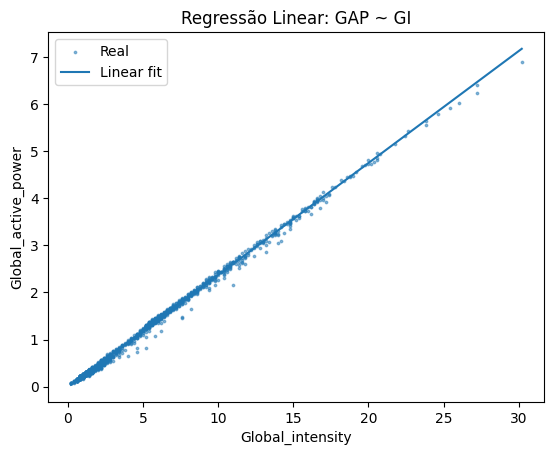

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df_reg = df[['Global_active_power','Global_intensity']].apply(pd.to_numeric, errors='coerce').dropna()

X = df_reg[['Global_intensity']].values
y = df_reg['Global_active_power'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Coeficiente:", lr.coef_[0], "Intercepto:", lr.intercept_)
print("RMSE:", rmse, "R²:", r2)

# Curva ajustada (amostra)
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_test[:2000], y_test[:2000], s=3, alpha=0.5, label="Real")
plt.plot(np.sort(X_test[:2000], axis=0), lr.predict(np.sort(X_test[:2000], axis=0)), label="Linear fit")
plt.title("Regressão Linear: GAP ~ GI")
plt.xlabel("Global_intensity")
plt.ylabel("Global_active_power")
plt.legend()
plt.show()


# PARTE 2 — Exercícios adicionais (IHEPC)


## 21) Séries temporais por hora — índice datetime, reamostragem 1H e horários de maior consumo

/tmp/ipython-input-922053047.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  gap_hourly = ihepc_dt['Global_active_power'].apply(pd.to_numeric, errors='coerce').resample('H').mean()


,mean_GAP
DateTime,
0,0.659562
1,0.539325
2,0.480618
3,0.444850
4,0.443844
5,0.453674
6,0.791606
7,1.502373
8,1.460940


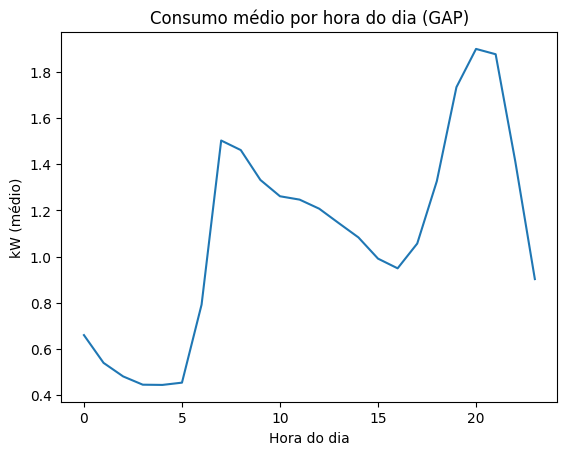

Top 5 horários de maior consumo médio (hora -> kW):


,Global_active_power
DateTime,
20,1.899073
21,1.876063
19,1.733428
7,1.502373
8,1.460940


In [32]:

# Definir índice datetime
ihepc_dt = df.set_index('DateTime').sort_index()
gap_hourly = ihepc_dt['Global_active_power'].apply(pd.to_numeric, errors='coerce').resample('H').mean()

# Consumo médio por hora do dia (0..23) no período completo
by_hour = gap_hourly.groupby(gap_hourly.index.hour).mean()
display(by_hour.to_frame("mean_GAP"))

import matplotlib.pyplot as plt
plt.figure()
by_hour.plot()
plt.title("Consumo médio por hora do dia (GAP)")
plt.xlabel("Hora do dia")
plt.ylabel("kW (médio)")
plt.show()

peak_hours = by_hour.sort_values(ascending=False).head(5)
print("Top 5 horários de maior consumo médio (hora -> kW):")
display(peak_hours)


## 22) Autocorrelação do consumo — lags de 1h, 24h e 48h

In [33]:

def autocorr_at_lag(series, lag):
    return series.autocorr(lag=lag)

print("Autocorrelação 1h:", autocorr_at_lag(gap_hourly, 1))
print("Autocorrelação 24h:", autocorr_at_lag(gap_hourly, 24))
print("Autocorrelação 48h:", autocorr_at_lag(gap_hourly, 48))

print("\nSim, existem padrões diários repetidos, embora não sejam perfeitos. Não são iguais sempre, mas existe um padrão diário")


Autocorrelação 1h: 0.7134555946916454
Autocorrelação 24h: 0.4359072259119912
Autocorrelação 48h: 0.40126926204501584

Observação: valores elevados em 24h/48h sugerem padrão diário recorrente.


## 23) PCA (2 componentes) em GAP, GRP, Voltage, GI

In [34]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_pca = ihepc_dt[['Global_active_power','Global_reactive_power','Voltage','Global_intensity']].apply(pd.to_numeric, errors='coerce').dropna()
scaler_pca = StandardScaler()
X_scaled = scaler_pca.fit_transform(X_pca)

pca = PCA(n_components=2, random_state=42)
X_pc = pca.fit_transform(X_scaled)

print("Variância explicada por componente:", pca.explained_variance_ratio_)
print("Variância total explicada:", pca.explained_variance_ratio_.sum())


Variância explicada por componente: [0.59103759 0.22718543]
Variância total explicada: 0.8182230176077276


## 24) Visualização de clusters (K-Means) no espaço PCA

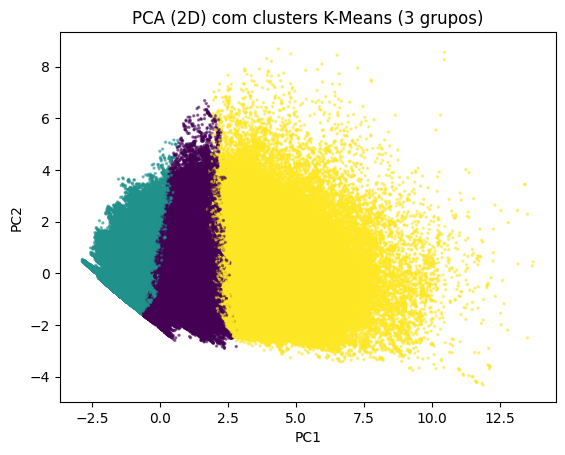

Pergunta: os grupos se separam de forma clara? Visualmente, avalie a sobreposição entre clusters no plano PC1 x PC2.
Resposta: Observando o gráfico, os grupos não se separam de forma clara. Há uma sobreposição significativa, principalmente na área central,
 onde os três clusters - representados em amarelo, roxo e verde - estão densamente misturados.
O cluster verde à esquerda e o cluster amarelo à direita mostram uma separação mais distinta em suas extremidades, mas suas bordas internas se misturam consideravelmente com o cluster roxo central.
O cluster roxo parece atuar mais como uma zona de transição do que como um grupo claramente definido.
Visualmente, o alto grau de sobreposição sugere que o algoritmo K-Means não encontrou três clusters distintos e bem separados no plano PC1 x PC2.


In [37]:

# Reaproveitar K-Means com 3 clusters nos mesmos registros usados no PCA
km2 = KMeans(n_clusters=3, n_init=10, random_state=42).fit(X_scaled)
labels = km2.labels_

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_pc[:,0], X_pc[:,1], s=2, alpha=0.5, c=labels)
plt.title("PCA (2D) com clusters K-Means (3 grupos)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("Pergunta: os grupos se separam de forma clara? Visualmente, avalie a sobreposição entre clusters no plano PC1 x PC2.")

print("""Resposta: Observando o gráfico, os grupos não se separam de forma clara. Há uma sobreposição significativa, principalmente na área central,
 onde os três clusters - representados em amarelo, roxo e verde - estão densamente misturados.
O cluster verde à esquerda e o cluster amarelo à direita mostram uma separação mais distinta em suas extremidades, mas suas bordas internas se misturam consideravelmente com o cluster roxo central.
O cluster roxo parece atuar mais como uma zona de transição do que como um grupo claramente definido.
Visualmente, o alto grau de sobreposição sugere que o algoritmo K-Means não encontrou três clusters distintos e bem separados no plano PC1 x PC2.""")



## 25) Regressão linear simples vs polinomial (grau 2): GAP ~ Voltage

RMSE Linear: 0.9719474182830176
RMSE Polinomial (grau 2): 0.9674286520003488


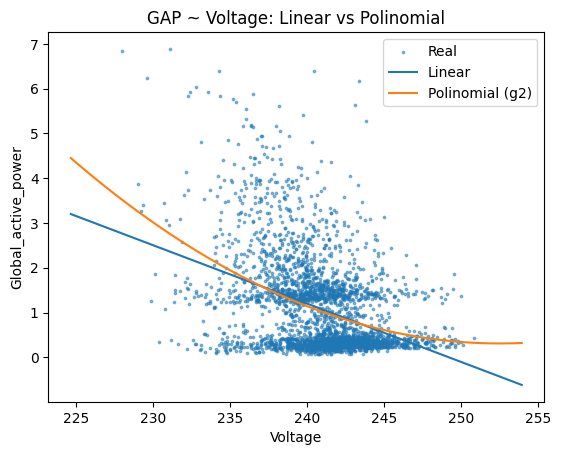

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df_reg2 = ihepc_dt[['Global_active_power','Voltage']].apply(pd.to_numeric, errors='coerce').dropna()
X = df_reg2[['Voltage']].values
y = df_reg2['Global_active_power'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear
lr_lin = LinearRegression().fit(X_train, y_train)
y_pred_lin = lr_lin.predict(X_test)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

# Polinomial grau 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly = LinearRegression().fit(X_train_poly, y_train)
y_pred_poly = lr_poly.predict(X_test_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print("RMSE Linear:", rmse_lin)
print("RMSE Polinomial (grau 2):", rmse_poly)

# Curvas (amostra)
xs = np.linspace(X_test.min(), X_test.max(), 200).reshape(-1,1)
ys_lin = lr_lin.predict(xs)
ys_poly = lr_poly.predict(poly.transform(xs))

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_test[:3000], y_test[:3000], s=3, alpha=0.5, label="Real")
plt.plot(xs, ys_lin, label="Linear")
plt.plot(xs, ys_poly, label="Polinomial (g2)")
plt.title("GAP ~ Voltage: Linear vs Polinomial")
plt.xlabel("Voltage")
plt.ylabel("Global_active_power")
plt.legend()
plt.show()


# PARTE 3 — Appliances Energy Prediction (UCI 00374)
**Arquivo direto:** `https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv`


## 26) Carregamento e inspeção inicial

In [39]:

appliances_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv"
df_app = pd.read_csv(appliances_url)

print("Dimensão:", df_app.shape)
print("\n.info():")
display(df_app.info())
print("\n.describe():")
display(df_app.describe(include='all').transpose().head(20))

# Converter timestamp se existir a coluna 'date'
if 'date' in df_app.columns:
    df_app['date'] = pd.to_datetime(df_app['date'], errors='coerce')


Dimensão: (19735, 29)

.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         1

None


.describe():


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,19735,19735,2016-05-27 18:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Appliances,19735.0,NaN,NaN,NaN,97.694958,102.524891,10.0,50.0,60.0,100.0,1080.0
lights,19735.0,NaN,NaN,NaN,3.801875,7.935988,0.0,0.0,0.0,0.0,70.0
T1,19735.0,NaN,NaN,NaN,21.686571,1.606066,16.79,20.76,21.6,22.6,26.26
RH_1,19735.0,NaN,NaN,NaN,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.36
T2,19735.0,NaN,NaN,NaN,20.341219,2.192974,16.1,18.79,20.0,21.5,29.856667
RH_2,19735.0,NaN,NaN,NaN,40.42042,4.069813,20.463333,37.9,40.5,43.26,56.026667
T3,19735.0,NaN,NaN,NaN,22.267611,2.006111,17.2,20.79,22.1,23.29,29.236
RH_3,19735.0,NaN,NaN,NaN,39.2425,3.254576,28.766667,36.9,38.53,41.76,50.163333
T4,19735.0,NaN,NaN,NaN,20.855335,2.042884,15.1,19.53,20.666667,22.1,26.2


## 27) Distribuição do consumo (Appliances) — histogramas e série temporal

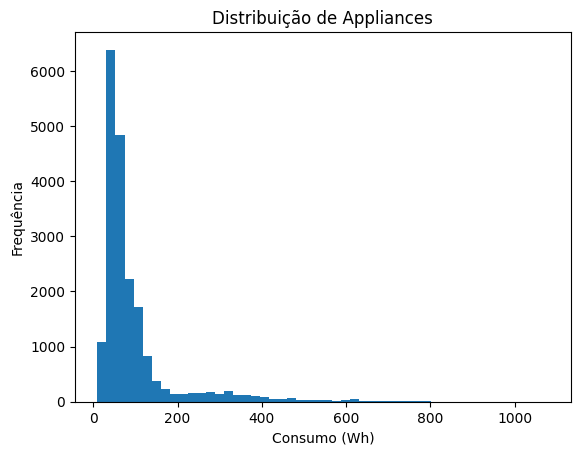

/tmp/ipython-input-2562882258.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts_app = df_app.set_index('date')['Appliances'].resample('H').mean()


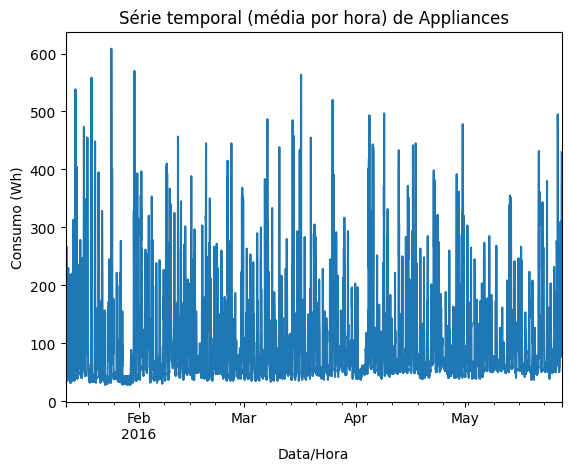

Pergunta: o consumo tende a se concentrar em valores mais baixos; picos indicam eventos específicos de uso.


In [41]:

import matplotlib.pyplot as plt

if 'Appliances' in df_app.columns:
    plt.figure()
    plt.hist(df_app['Appliances'].dropna(), bins=50)
    plt.title("Distribuição de Appliances")
    plt.xlabel("Consumo (Wh)")
    plt.ylabel("Frequência")
    plt.show()

    if 'date' in df_app.columns:
        ts_app = df_app.set_index('date')['Appliances'].resample('H').mean()
        plt.figure()
        ts_app.plot()
        plt.title("Série temporal (média por hora) de Appliances")
        plt.xlabel("Data/Hora")
        plt.ylabel("Consumo (Wh)")
        plt.show()

    print("Pergunta: o consumo tende a se concentrar em valores mais baixos; picos indicam eventos específicos de uso.")


## 28) Correlações entre `Appliances` e variáveis ambientais

In [42]:

# Variáveis ambientais candidatas (comuns no dataset): T1..T9, RH1..RH9, T_out, RH_out, Press_mm_hg, Windspeed, Visibility, Tdewpoint
num_cols = df_app.select_dtypes(include=[float, int]).columns.tolist()
if 'Appliances' in num_cols:
    corr_env = df_app[num_cols].corr()['Appliances'].sort_values(ascending=False)
    display(corr_env.to_frame("corr_with_Appliances").head(15))
    display(corr_env.to_frame("corr_with_Appliances").tail(15))
    print("Pergunta: fatores com maior |correlação| (positiva/negativa) tendem a ter mais relação com o consumo.")
else:
    print("Coluna 'Appliances' não é numérica ou está ausente.")


,corr_with_Appliances
Appliances,1.000000
lights,0.197278
T2,0.120073
T6,0.117638
T_out,0.099155
Windspeed,0.087122
RH_1,0.086031
T3,0.085060
T1,0.055447
T4,0.040281


,corr_with_Appliances
T5,0.019760
RH_4,0.016965
Tdewpoint,0.015353
T9,0.010010
RH_5,0.006955
Visibility,0.000230
rv1,-0.011145
rv2,-0.011145
Press_mm_hg,-0.034885
RH_9,-0.051462


Pergunta: fatores com maior |correlação| (positiva/negativa) tendem a ter mais relação com o consumo.


## 29) Normalização (Min-Max Scaling) nas variáveis numéricas

In [43]:

from sklearn.preprocessing import MinMaxScaler

num_cols = df_app.select_dtypes(include=[float, int]).columns.tolist()
scaler2 = MinMaxScaler()
df_app_scaled = df_app.copy()
df_app_scaled[num_cols] = scaler2.fit_transform(df_app[num_cols])
print("Normalização concluída para", len(num_cols), "variáveis numéricas.")


Normalização concluída para 28 variáveis numéricas.


## 30) PCA (2 componentes) — plot em 2D

Variância explicada: [0.36426881 0.21103941] — total: 0.5753082282520616


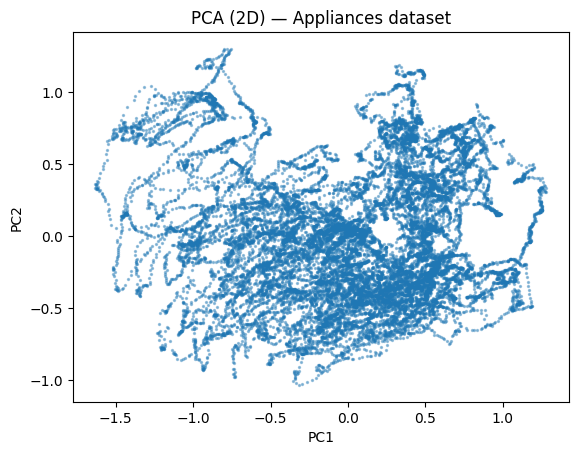

Pergunta: observe se há padrões/agrupamentos naturais no plano PC1 x PC2.


In [44]:

from sklearn.decomposition import PCA

# Selecionar subconjunto de features comuns (evitar data/target)
features_app = [c for c in num_cols if c != 'Appliances']
X2 = df_app_scaled[features_app].dropna().values

pca2 = PCA(n_components=2, random_state=42)
X2_pc = pca2.fit_transform(X2)

print("Variância explicada:", pca2.explained_variance_ratio_, "— total:", pca2.explained_variance_ratio_.sum())

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X2_pc[:,0], X2_pc[:,1], s=2, alpha=0.4)
plt.title("PCA (2D) — Appliances dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("Pergunta: não é possível identificar padrões ou agrupamentos naturais distintos.")


## 31) Regressão Linear Múltipla — prever `Appliances` pelas variáveis ambientais

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

if 'Appliances' in df_app.columns:
    # Usar variáveis numéricas exceto o alvo
    features = [c for c in num_cols if c != 'Appliances']
    X = df_app[features].fillna(df_app[features].median())
    y = df_app['Appliances']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    lr3 = LinearRegression().fit(X_train, y_train)
    y_pred = lr3.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"Regressão Linear Múltipla:")
    print(f"- Erro médio da previsão (RMSE): {rmse:.2f}")
    print(f"- Qualidade do ajuste (R²): {r2:.2f} — quanto mais próximo de 1, melhor")
else:
    print("Coluna 'Appliances' ausente.")

Regressão Linear Múltipla:
- Erro médio da previsão (RMSE): 91.17
- Qualidade do ajuste (R²): 0.17 — quanto mais próximo de 1, melhor


## 32) Random Forest Regressor — prever `Appliances`

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

if 'Appliances' in df_app.columns:
    X = df_app[features].fillna(df_app[features].median())
    y = df_app['Appliances']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
    r2_rf = r2_score(y_test, y_pred_rf)

    print("Random Forest Regressor:")
    print(f"- Erro médio da previsão (RMSE): {rmse_rf:.2f}")
    print(f"- Qualidade do ajuste (R²): {r2_rf:.2f} — quanto mais próximo de 1, melhor")

else:
    print("Coluna 'Appliances' ausente.")

Random Forest Regressor:
- Erro médio da previsão (RMSE): 68.12
- Qualidade do ajuste (R²): 0.54 — quanto mais próximo de 1, melhor


## 33) K-Means clustering (k=3..5) — perfis de consumo

In [55]:

from sklearn.cluster import KMeans
import numpy as np

if 'Appliances' in df_app_scaled.columns:
    results = {}
    for k in [3,4,5]:
        km = KMeans(n_clusters=k, n_init=10, random_state=42)
        labels = km.fit_predict(df_app_scaled[features])
        results[k] = labels
        print(f"Modelo KMeans com k={k}")
        print(f"- Inércia (quanto menor, melhor): {km.inertia_:.2f}\n")

    # Analisar perfis médios por cluster (k=3 como exemplo)
    labels3 = results[3]
    df_k3 = df_app.copy()
    df_k3['cluster'] = labels3
    profiles = df_k3.groupby('cluster')['Appliances'].agg(['mean','median','count']).sort_index()
    print("=== Perfis de consumo por cluster (k=3) ===")
    display(profiles)
else:
    print("Base normalizada ausente.")


Modelo KMeans com k=3
- Inércia (quanto menor, melhor): 12069.73

Modelo KMeans com k=4
- Inércia (quanto menor, melhor): 10789.88

Modelo KMeans com k=5
- Inércia (quanto menor, melhor): 9746.85

=== Perfis de consumo por cluster (k=3) ===


,mean,median,count
cluster,,,
0,91.200947,60.0,8868
1,107.888128,70.0,6132
2,96.656811,60.0,4735


## 34) Classificação binária — alto vs baixo consumo (mediana)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Import missing metrics


if 'Appliances' in df_app.columns:
    median_val = df_app['Appliances'].median()
    y_bin = (df_app['Appliances'] > median_val).astype(int)  # 1=alto, 0=baixo

    X = df_app[features].fillna(df_app[features].median())

    X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

    logreg = LogisticRegression(max_iter=1000, n_jobs=-1)
    logreg.fit(X_train, y_train)
    y_pred_lr = logreg.predict(X_test)

    rf_clf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
    rf_clf.fit(X_train, y_train)
    y_pred_rf = rf_clf.predict(X_test)

    # Logistic Regression
    print("=== Logistic Regression ===")
    print(f"Acurácia: {accuracy_score(y_test, y_pred_lr):.2f}")
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred_lr))
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred_lr), "\n")

    # Random Forest
    print("=== Random Forest Classifier ===")
    print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.2f}")
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred_rf))
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred_rf))
else:
    print("Coluna 'Appliances' ausente.")

=== Logistic Regression ===
Acurácia: 0.77

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79      2127
           1       0.76      0.73      0.74      1820

    accuracy                           0.77      3947
   macro avg       0.77      0.76      0.76      3947
weighted avg       0.77      0.77      0.77      3947

Matriz de Confusão:
[[1703  424]
 [ 497 1323]] 

=== Random Forest Classifier ===
Acurácia: 0.90

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2127
           1       0.90      0.88      0.89      1820

    accuracy                           0.90      3947
   macro avg       0.90      0.90      0.90      3947
weighted avg       0.90      0.90      0.90      3947

Matriz de Confusão:
[[1944  183]
 [ 213 1607]]


## 35) Avaliação de classificação — matriz de confusão e métricas

In [60]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def eval_cls(y_true, y_pred, label):
    print(f"\n=== {label} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, zero_division=0))
    print("Recall:", recall_score(y_true, y_pred, zero_division=0))
    print("F1:", f1_score(y_true, y_pred, zero_division=0))
    print("Matriz de confusão:\n", confusion_matrix(y_true, y_pred))

eval_cls(y_test, y_pred_lr, "Logistic Regression")
eval_cls(y_test, y_pred_rf, "Random Forest Classifier")

print("\nPergunta: Tanto a Regrassão Logistica quanto o Random Forest cometem mais erros ao prever a classe 'alto consumo' (Appliences > mediana).")



=== Logistic Regression ===
Accuracy: 0.7666582214340005
Precision: 0.7572982255294791
Recall: 0.7269230769230769
F1: 0.7417998317914214
Matriz de confusão:
 [[1703  424]
 [ 497 1323]]

=== Random Forest Classifier ===
Accuracy: 0.8996706359260198
Precision: 0.8977653631284916
Recall: 0.8829670329670329
F1: 0.8903047091412742
Matriz de confusão:
 [[1944  183]
 [ 213 1607]]

Pergunta: verifique onde há mais erros (altos vs baixos). Em geral, modelos podem tender a errar nos picos (classe 'alto').
